# BLIP: Bootstrapping Language-Image Pre-training for Unified Vision-Language Understanding and Generation

- Model card for BLIP trained on visual question answering- base architecture (with ViT base backbone).
- https://huggingface.co/Salesforce/blip-vqa-base


In [3]:
import requests
from PIL import Image
from matplotlib.pyplot import imshow
from transformers import BlipProcessor, BlipForQuestionAnswering, pipeline


In [4]:
processor = BlipProcessor.from_pretrained("Salesforce/blip-vqa-base")
model = BlipForQuestionAnswering.from_pretrained("Salesforce/blip-vqa-base")

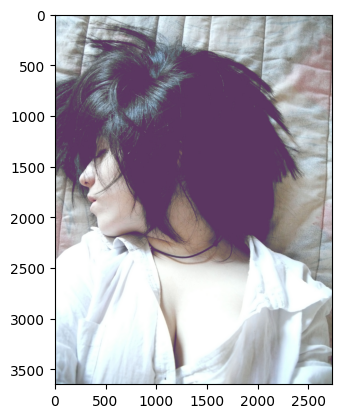

In [10]:
img_url = 'https://c5.staticflickr.com/5/4024/4323769914_8f7b8a4a55_o.jpg' 
img = Image.open(requests.get(img_url, stream=True).raw, 'r')

imshow(img)

In [6]:
raw_image = Image.open(requests.get(img_url, stream=True).raw).convert('RGB')

In [9]:
pipe = pipeline("visual-question-answering", model='Salesforce/blip-vqa-base')

In [11]:
pipe(raw_image, "What colors are the woman's blouse?", top_k=1, return_all_scores=True)

/root/miniconda3/envs/poc_vqa/lib/python3.12/site-packages/transformers/generation/utils.py:1132: UserWarning: Using the model-agnostic default `max_length` (=20) to control the generation length. We recommend setting `max_new_tokens` to control the maximum length of the generation.
  warnings.warn(


[{'answer': 'red and white'}]

In [11]:
question = "Who is present in the image?"
inputs = processor(
    raw_image, 
    question, 
    return_tensors="pt"
    )

In [12]:
out = model.generate(**inputs
                  
                     )
print(processor.decode(out[0], skip_special_tokens=True))


people
